Importing Libraries

In [15]:
import cv2
import numpy as np 
import matplotlib.pylab as plt

Function to generate number of pixels per gray level in the image

In [16]:
def histogram_generate(image):
    pixel_value = np.zeros(256, dtype=int) # number of pixels
    height, width = image.shape

    for row in range(height):
        for col in range(width):
            gray_level = image[row][col]
            pixel_value[gray_level] = pixel_value[gray_level] + 1
    
    return pixel_value

Function for making binary thresholding

In [17]:
def binary_thresholding(image, threshold_value):
    height, width = image.shape
    segmented_image = image.copy()

    for row in range(height):
        for col in range(width):
            if image[row][col] > threshold_value:
                segmented_image[row][col] = 255
            else:
                segmented_image[row][col] = 0

    return segmented_image

Loading the original image

In [18]:
original_image = cv2.imread('./images/img4.jpg', 0)
original_image = cv2.resize(original_image, (512, 512))
print(original_image.shape)

(512, 512)


Making pixel values in Histogram

In [19]:

pixel_value = histogram_generate(original_image)

Making Single Threshold Segmentation observed from the Histogram

In [20]:
# threshold_value = int(input("Give the threshold of the segmentation: "))
threshold_value = 127
segmented_image = original_image.copy()
segmented_image = binary_thresholding(segmented_image, threshold_value)

Displaying original image, binary image and histogram

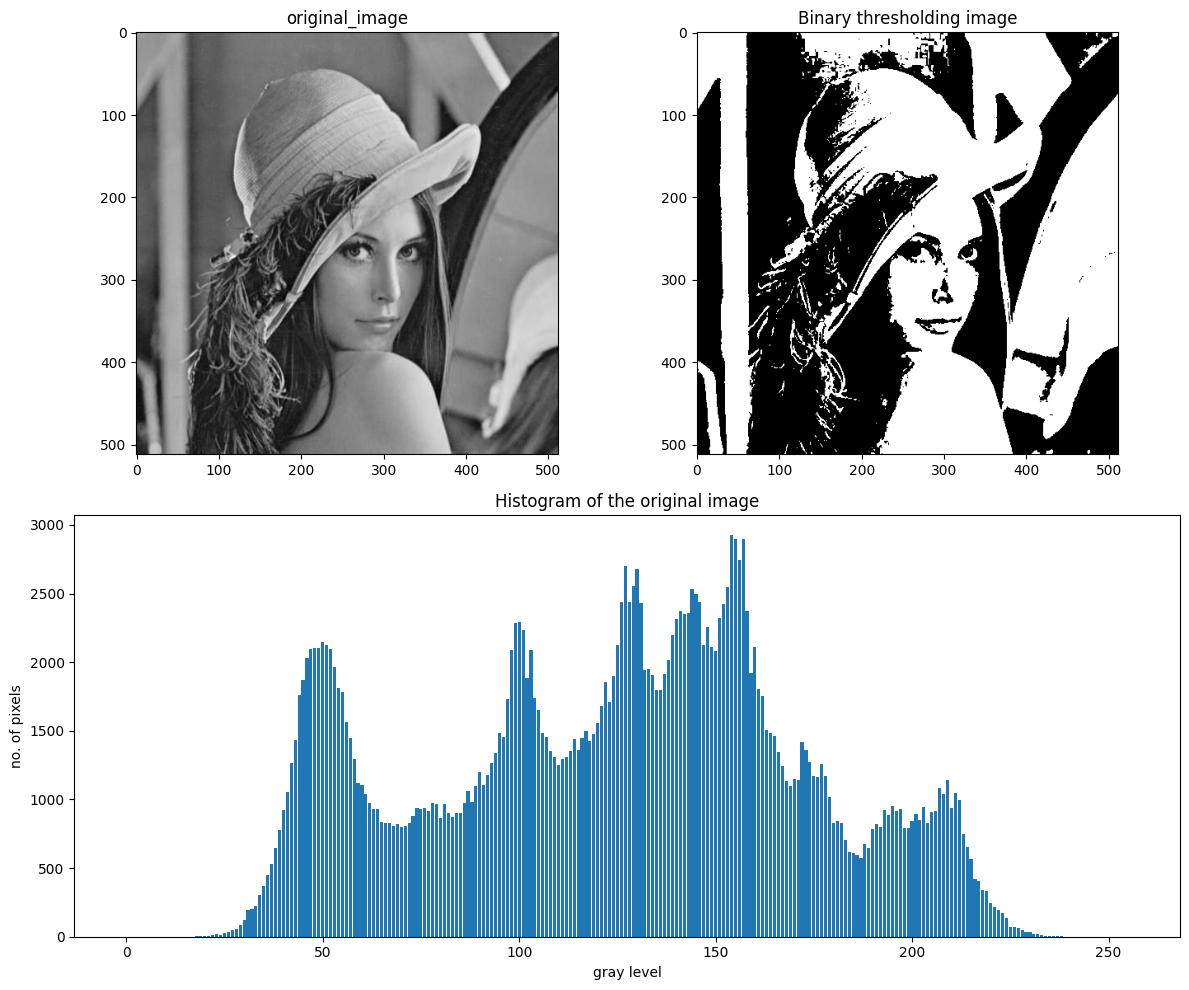

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('original_image')

plt.subplot(2, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Binary thresholding image')

plt.subplot(2, 2, (3, 4))
plt.bar(range(256), pixel_value)
plt.title('Histogram of the original image')
plt.xlabel('gray level')
plt.ylabel('no. of pixels')

plt.tight_layout()
plt.show()
